In [1]:
%matplotlib inline
import albumentations as A
import albumentations.pytorch
from albumentations.core.transforms_interface import ImageOnlyTransform
import cv2
import numpy as np
from numpy import linalg as LA
import random
import pandas as pd
import sys
import os
import numpy as np
# import openslide
import matplotlib.pyplot as plt
sys.path.append('../')

from augment import *

In [2]:
data_path = '../patches/train_data/Stomach/M/anno_stomach_M_0201/'
img_list = os.listdir(data_path)

In [3]:
# img = cv2.imread(data_path + img_list[0])
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# # img = cv2.resize(img, dsize=(128, 128))
# print(img.shape)
# # print(np.transpose(img[122:125,150:153,:]), (2, 0, 1))
# plt.imshow(img)

In [4]:
# img = cv2.imread(data_path + img_list[0])
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# transform = A.Compose([
# #     A.HorizontalFlip(p=1.0),@
    
#     HEColorAugment(sigma1=0.5, sigma2=1., p=1.0)
# ])
# transformed = transform(image=img )
# aug_img = transformed['image'].astype(np.uint16)
# # print(np.transpose(aug_img[122:125,150:153,:]), (2, 0, 1))
# plt.imshow(aug_img)

In [5]:
# img = cv2.imread(data_path + img_list[1])
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# transform = A.Compose([
#     HEColorAugment(sigma1=0.1, sigma2=2., p=1.0)
# ])
# transformed = transform(image=img )
# aug_img = transformed['image'].astype(np.uint16)

# fig = plt.figure()
# rows = 1
# cols = 2

# ax1 = fig.add_subplot(rows, cols, 1)
# ax1.imshow(img)
# ax1.set_title('org')
# ax1.axis("off")
 
# ax2 = fig.add_subplot(rows, cols, 2)
# ax2.imshow(aug_img)
# ax2.set_title('augmented_rgb')
# ax2.axis("off")
 
# plt.show()

In [6]:
# # for stomach using PCA
stain_mat = np.array([[ 0.63854984,  0.25636421, -0.05117216],
 [ 0.72885336,  0.89928835,  0.35397438],
 [ 0.24388358,  0.33553481, -0.92226462]])

# Colon : train_colon_N_0001  
# for stomach using PCA
stain_mat = np.array([[ 0.52594301, -0.83961503, -0.05563272],
       [ 0.79520634,  0.46378454,  0.38152319],
       [ 0.2993344 ,  0.24503412, -0.91218593]])

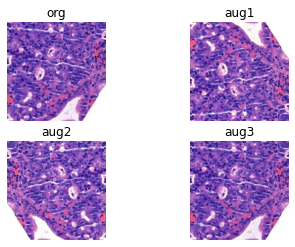

In [9]:
data_path = '../patches/train_data/Stomach/M/anno_stomach_M_0201/'
img_list = os.listdir(data_path)

img = cv2.imread(data_path + img_list[6])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
transform = A.Compose([
    A.OneOf([
        A.HorizontalFlip(p=.7),
        A.VerticalFlip(p=.7),
        A.RandomRotate90(p=.7)]
    ),    
    A.OneOf([
        HEColorAugment(sigma1=10, sigma2=2., mat=stain_mat, p=0.7),
        A.transforms.ColorJitter(brightness=0.05, contrast=0.05, saturation=0.05, hue=0.05, p=.7),]
    ),
])

aug_list = []
for i in range(3) :
    transformed = transform(image=img )
    aug_img = transformed['image'].astype(np.uint16)
    aug_list.append(aug_img)

fig = plt.figure()
rows = 2
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(img)
ax1.set_title('org')
ax1.axis("off")
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(aug_list[0])
ax2.set_title('aug1')
ax2.axis("off")

ax3 = fig.add_subplot(rows, cols, 3)
ax3.imshow(aug_list[1])
ax3.set_title('aug2')
ax3.axis("off")
 
ax4 = fig.add_subplot(rows, cols, 4)
ax4.imshow(aug_list[2])
ax4.set_title('aug3')
ax4.axis("off")

# plt.subplots(2,2,figsize=(5,5))
 
# plt.figure(figsize=(12,12))
plt.show()